<a href="https://colab.research.google.com/github/kmouleejunhyuk/bigdata_analysist_practical/blob/main/seoul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
#데이터 다운로드
import pandas as pd
import numpy as np
rawdata = pd.read_csv('https://raw.githubusercontent.com/kmouleejunhyuk/bigdata_analysist_practical/main/seoul.csv', encoding = 'cp949')

#data 살펴보기
rawdata.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [105]:
rawdata.describe()

,평균기온(℃),최저기온(℃),최고기온(℃)
count,38992.000000,38991.000000,38991.000000
mean,11.709681,7.410428,16.722446
std,10.659353,10.885431,10.990800
min,-19.200000,-23.100000,-16.300000
25%,2.700000,-1.500000,7.200000
50%,12.900000,8.000000,18.600000
75%,21.200000,17.000000,26.200000
max,33.100000,28.800000,38.400000


In [96]:
#결측치, 중복 여부 검사 및 제거
rawdata.isnull().sum()

날짜           0
지점           0
평균기온(℃)    756
최저기온(℃)    757
최고기온(℃)    757
dtype: int64

In [97]:
rawdata.duplicated().sum()

0

In [98]:
#rawdata.replace({-999: np.nan}, inplace = True)
#rawdata.dropna(inplace= True)

In [99]:
#날짜 파생변수 생성(날짜 --> 년, 월, 일)
rawdata['년'] = rawdata['날짜'].map(lambda x: x.split('-')[0])
rawdata['월'] = rawdata['날짜'].map(lambda x: x.split('-')[1])
rawdata['일'] = rawdata['날짜'].map(lambda x: x.split('-')[2])

In [100]:
#지점, 날짜 컬럼 제거
rawdata.drop(['지점', '날짜'], axis = 1, inplace = True)

In [101]:
#년-월별 컬럼별 평균 확인
group = rawdata.groupby(by = ['월', '년']).mean()

In [102]:
group

평균기온(℃)    최저기온(℃)   최고기온(℃)
월  년                                  
01 1908 -3.464516  -7.506452  0.138710
   1909 -2.509677  -7.261290  2.006452
   1910 -2.258065  -5.606452  1.864516
   1911 -4.961290  -9.970968 -0.038710
   1912 -4.687097 -10.106452  0.422581
...           ...        ...       ...
12 2012 -4.119355  -7.390323 -0.519355
   2013 -0.183871  -3.496774  3.525806
   2014 -2.919355  -6.722581  1.496774
   2015  1.593548  -2.119355  5.996774
   2016  1.245161  -2.670968  5.800000

[1307 rows x 3 columns]

In [104]:
#2000년 1월의 가장 높은 최저기온
rawdata.groupby(['년', '월']).max().loc['2000', '최저기온(℃)'].loc['01']

2.6

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0, flags=flags)


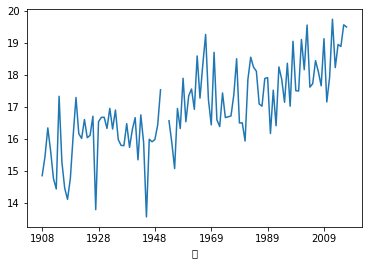

In [93]:
group.loc['05', '평균기온(℃)'].plot.line()    #각 년도의 01월 평균 기온 변화 추이